# Fishing with TD3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import gym
import gym_fishing

from stable_baselines3 import TD3

In [4]:
# We use fishing-v1 to test TD3 because it use a continuous action space
env = gym.make('fishing-v1')
env.n_actions = 100
model = TD3('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [5]:
model.learn(total_timesteps=200000)

      |
|    episodes        | 432      |
|    fps             | 89       |
|    time_elapsed    | 7        |
|    total timesteps | 662      |
| train/             |          |
|    learning_rate   | 0.001    |
|    n_updates       | 558      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 436      |
|    fps             | 89       |
|    time_elapsed    | 7        |
|    total timesteps | 678      |
| train/             |          |
|    learning_rate   | 0.001    |
|    n_updates       | 574      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 440      |
|    fps             | 90       |
|    time_elapsed    | 7        |
|    total timesteps | 694      |
| train/             |          |
|    learning_rate   | 0.001    |
|    n_updates       | 590      |
---------------------------------
---------------------------------
| time

In [6]:
def simulate(environment, model):
  obs = env.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action, _states = model.predict(obs)
    obs, reward, dones, info = env.step(action)  
    episode_return += reward
    output[it] = (it, obs, action, episode_return)
  return output

In [7]:
out = simulate(env, model)
np.savetxt("td3.csv", out, delimiter=",")

### Vizualisation

In [8]:
datapath = '/Users/kevinab/Desktop/PRe/conservation-agents/td3.csv'
results = pd.read_csv(datapath, names=['time','state','harvest','action'])

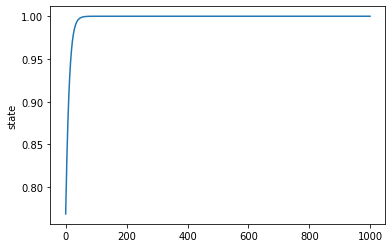

In [9]:
plt.plot(results.iloc[:,1])
plt.ylabel('state')
plt.show()

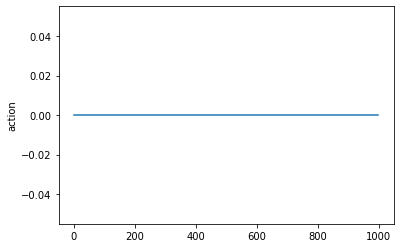

In [10]:
plt.plot(results.iloc[:,2])
plt.ylabel('action')
plt.show()

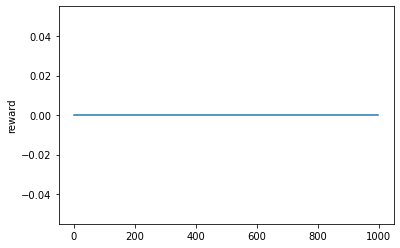

In [11]:
plt.plot(results.iloc[:,3])
plt.ylabel('reward')
plt.show()